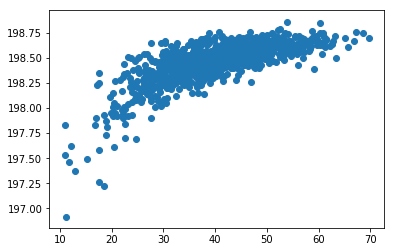

In [9]:
%matplotlib inline
from pylab import *
import numpy as np

np.random.seed(16)

age = np.random.normal(40.0, 10.0, 1000)
height = 200 - (age + np.random.normal(20, 4, 1000)) / age

scatter(age,height)

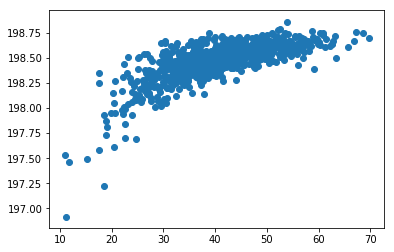

In [10]:
# split data for training the model
# normally data should be splitted randomly, but not important it is already randomly generated
trainX = age[:800]
testX = age[800:]
trainY = height[:800]
testY = height[800:]

# first 800 data points
scatter(trainX, trainY)

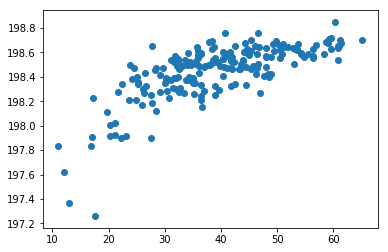

In [11]:
# last 200 data points
scatter(testX, testY)

In [12]:
x = np.array(trainX)
y = np.array(trainY)

# 5th degree of polynom
p3 = np.poly1d(np.polyfit(x, y, 5))

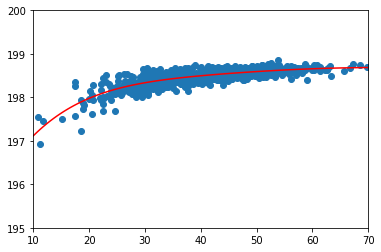

In [13]:
import matplotlib.pyplot as plt

xp = np.linspace(10,70,100)

axes = plt.axes()
axes.set_xlim([10,70])
axes.set_ylim([195,200])
plt.scatter(x, y)
plt.plot(xp, p3(xp), c='r')
plt.show()

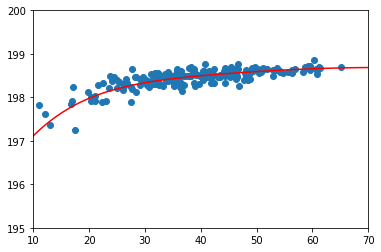

In [14]:
testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([10,70])
axes.set_ylim([195,200])
plt.scatter(testx, testy)
plt.plot(xp, p3(xp), c='r')
plt.show()

In [15]:
# apply on test set
from sklearn.metrics import r2_score
r2 = r2_score(testy, p3(testx))
print(r2)

0.6333161140381083


In [16]:
# apply on train test
from sklearn.metrics import r2_score
r2 = r2_score(y, p3(x))
print(r2)

0.6527544563501462


In [18]:
from sklearn.model_selection import train_test_split
# x-age, y-height
X_train, X_test, y_train, y_test = train_test_split(age, height, test_size=0.2, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)

# Reshape your data either using array.reshape(-1, 1) if your data has a single feature 
# or array.reshape(1, -1) if it contains a single sample.
X_poly = poly_reg.fit_transform(X_train.reshape(-1,1))
